In [118]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
sns.set(style="ticks")
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from IPython.display import Image
import graphviz
from io import StringIO 
import pydotplus
from sklearn.model_selection import GridSearchCV

In [20]:
diabetes = load_diabetes()

In [3]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
df_diabetes.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

<AxesSubplot:>

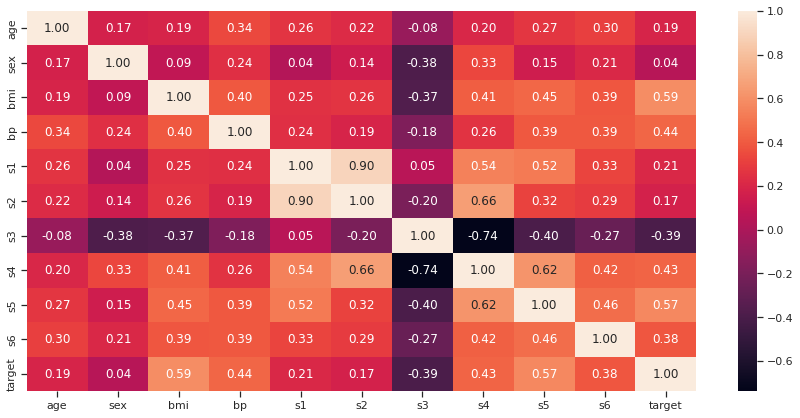

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_diabetes.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')



In [6]:
df_diabetes

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.017646   151.0  
1   -0.039493 -0.068330 -0.092204    75.0  
2   -0.002592  0.002864 -0.025930   141.0  
3    0.034309  0.022692 -0.009362   206.0  
4   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  

[442 rows x 11 columns]

In [7]:
df_diabetes_X_train, df_diabetes_X_test, df_diabetes_y_train, df_diabetes_y_test = train_test_split(
    df_diabetes['bmi'].values, diabetes.target, test_size=0.3, random_state=1)

In [8]:
df_diabetes_X_train.shape, df_diabetes_y_train.shape

((309,), (309,))

<AxesSubplot:xlabel='bmi', ylabel='target'>

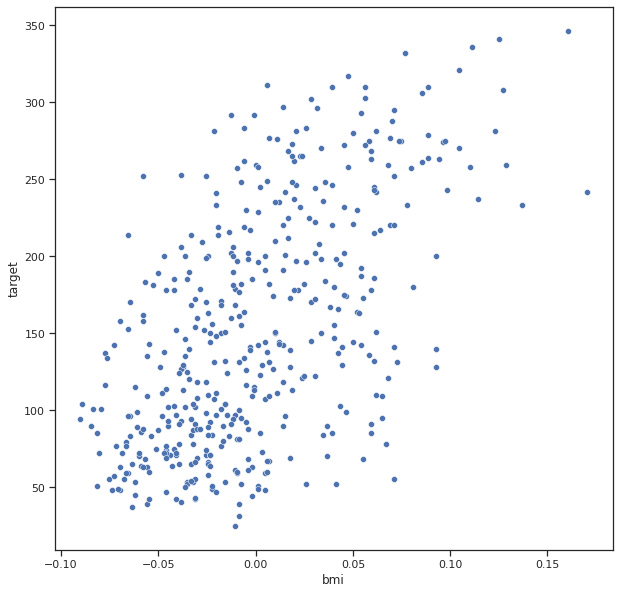

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='bmi', y='target', data=df_diabetes)



In [10]:
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1


In [11]:
x_array = df_diabetes['bmi'].values
y_array = df_diabetes['target'].values


In [12]:
b0, b1 = analytic_regr_coef(df_diabetes_X_train, df_diabetes_y_train)
b0, b1

(151.41241649570495, 1030.6208976378794)

In [13]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [43]:
y_array_regr = y_regr(df_diabetes_X_train, b0, b1)

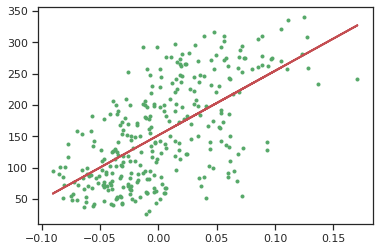

In [44]:
plt.plot(df_diabetes_X_train, df_diabetes_y_train, 'g.')
plt.plot(df_diabetes_X_train, y_array_regr, 'r', linewidth=2.0)
plt.show()


In [45]:
df_diabetes_X_train

array([ 0.10480869, -0.03099563,  0.06708527, -0.01159501,  0.00672779,
       -0.00189471, -0.03530688,  0.097264  , -0.07949718,  0.05954058,
       -0.04824063, -0.00728377, -0.02021751, -0.046085  , -0.01590626,
        0.0519959 , -0.02452876,  0.06385183,  0.03043966, -0.00836158,
       -0.02560657,  0.00457217, -0.02884001, -0.01267283,  0.00672779,
       -0.0730303 , -0.0547075 , -0.03315126,  0.03906215, -0.03422907,
       -0.05794093, -0.03854032,  0.07139652, -0.01159501,  0.05415152,
       -0.04069594, -0.06979687,  0.02397278, -0.02452876, -0.02560657,
        0.01750591, -0.05578531,  0.0347509 ,  0.11127556,  0.00457217,
        0.0164281 ,  0.02073935,  0.03906215, -0.00620595,  0.04229559,
       -0.01590626,  0.06169621, -0.03961813, -0.03207344,  0.00672779,
       -0.03422907, -0.04177375, -0.02345095, -0.06979687,  0.05415152,
        0.07139652,  0.0703187 ,  0.02181716,  0.07247433,  0.06924089,
       -0.0816528 , -0.02345095,  0.08540807,  0.00888341,  0.12

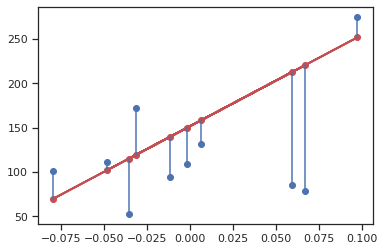

In [46]:
K_mnk=10

plt.plot(df_diabetes_X_train[1:K_mnk+1], df_diabetes_y_train[1:K_mnk+1], 'bo')
plt.plot(df_diabetes_X_train[1:K_mnk+1], y_array_regr[1:K_mnk+1], '-ro', linewidth=2.0)

for i in range(len(df_diabetes_X_train[1:K_mnk+1])):
    x1 = df_diabetes_X_train[1:K_mnk+1][i]
    y1 = df_diabetes_y_train[1:K_mnk+1][i]
    y2 = y_array_regr[1:K_mnk+1][i]
    plt.plot([x1,x1],[y1,y2],'b-')

plt.show()


In [47]:
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    # Значения для коэффициентов по умолчанию
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        # Вычисление новых предсказанных значений
        # используется векторизованное умножение и сложение для вектора и константы
        y_pred = b1 * x_array + b0
        # Расчет градиентов
        # np.multiply - поэлементное умножение векторов
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        # Изменение значений коэффициентов:
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    # Результирующие значения
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred

In [48]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(df_diabetes_X_train, df_diabetes_y_train, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(y_array_regr, grad_y_pred)))
    plt.plot(df_diabetes_X_train, df_diabetes_y_train, 'g.')
    plt.plot(df_diabetes_X_train, y_array_regr, 'b', linewidth=2.0)
    plt.plot(df_diabetes_X_train, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = 151.41241649570495 - (теоретический), 133.24842814594493 - (градиентный спуск)
b1 = 1030.6208976378794 - (теоретический), 5.1409703721822915 - (градиентный спуск)
MSE = 2886.897653734112


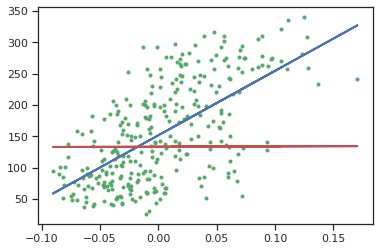

In [49]:
show_gradient_descent(1000, 0, 0)

b0 = 151.41241649570495 - (теоретический), 153.07878213324895 - (градиентный спуск)
b1 = 1030.6208976378794 - (теоретический), 384.62384801797657 - (градиентный спуск)
MSE = 973.8774870425398


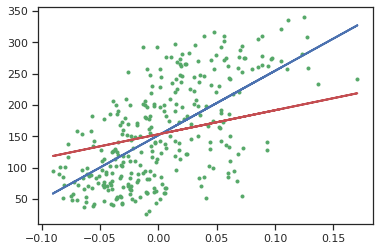

In [50]:
show_gradient_descent(100000, 0, 0)

b0 = 151.41241649570495 - (теоретический), 151.4373890033344 - (градиентный спуск)
b1 = 1030.6208976378794 - (теоретический), 1020.9398493211834 - (градиентный спуск)
MSE = 0.21871976605313137


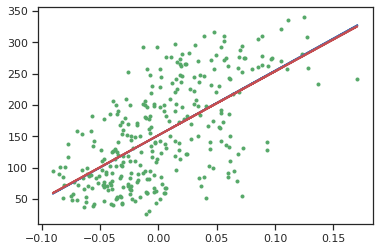

In [51]:
show_gradient_descent(1000000, 0, 0)

b0 = 151.41241649570495 - (теоретический), 144.53617196565256 - (градиентный спуск)
b1 = 1030.6208976378794 - (теоретический), 1000.2568504040452 - (градиентный спуск)
MSE = 50.51509766161462


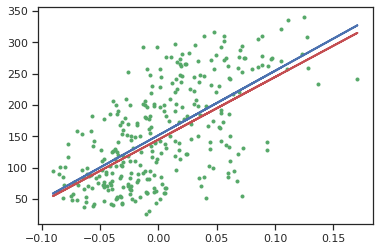

In [52]:
show_gradient_descent(1000, 100, 1000)

In [53]:
cl1_2 = LinearRegression()
reg1 = cl1_2.fit(df_diabetes_X_train.reshape(-1, 1), df_diabetes_y_train.reshape(-1, 1))

(b1, reg1.coef_), (b0, reg1.intercept_)



((1030.6208976378794, array([[1030.62089764]])),
 (151.41241649570495, array([151.4124165])))

In [54]:
from sklearn.linear_model import Ridge

In [56]:
reg4 = Ridge().fit(df_diabetes_X_train.reshape(-1, 1), df_diabetes_y_train.reshape(-1, 1))
(b1, reg4.coef_), (b0, reg4.intercept_)
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(boston_x.reshape(-1, 1), boston_y)
    boston_y_pred = clf.predict(boston_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(boston_x, boston_y, 'b.')
    ax.plot(boston_x, boston_y_pred, 'ro')
    plt.show()

In [42]:
digits = load_digits()

In [43]:
digits_X = digits.data[:, :2]
digits_y = digits.target


In [44]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def plot_cl(clf):
    title = clf.__repr__
    clf.fit(digits_X, digits_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = digits_X[:, 0], digits_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=digits_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

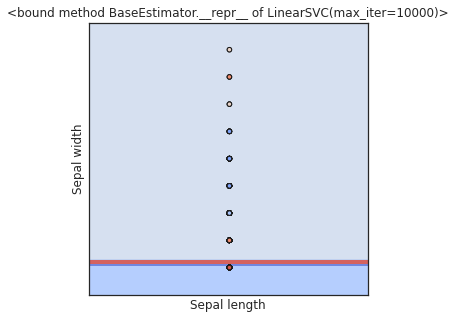

In [45]:


plot_cl(LinearSVC(C=1.0, max_iter=10000))



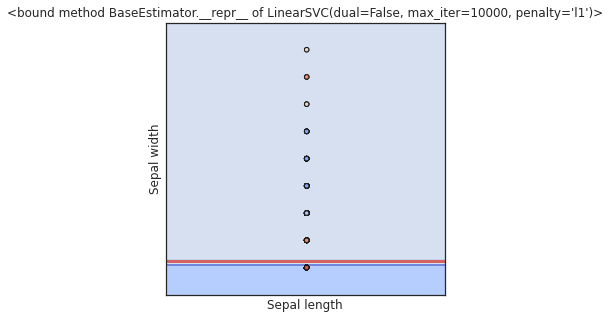

In [46]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000))

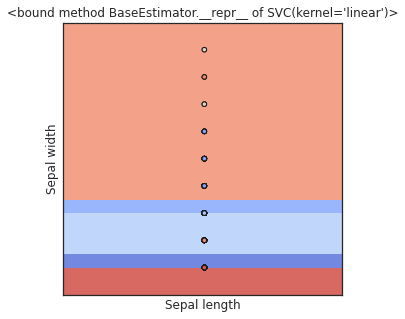

In [47]:


plot_cl(SVC(kernel='linear', C=1.0))



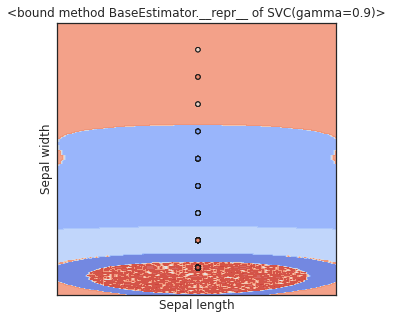

In [9]:


plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))



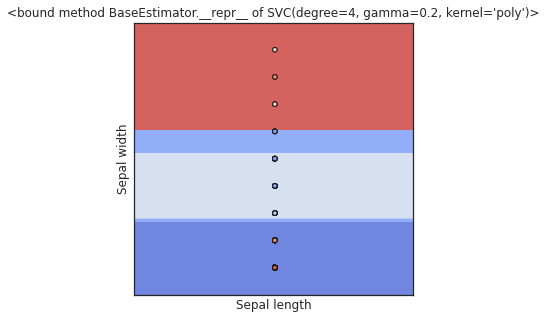

In [10]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.2, C=1.0))


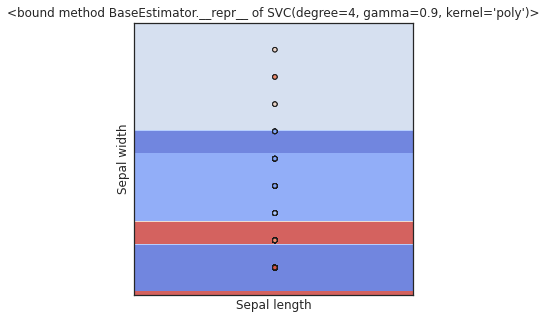

In [12]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.9, C=1.0))

In [52]:
diabetes_x_ds = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
diabetes_x_ds.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01

In [53]:
def random_dataset_for_regression():
    
    rng = np.random.RandomState(1)
    X_train = np.sort(5 * rng.rand(80, 1), axis=0)
    y_train = np.sin(X_train).ravel()
    y_train[::5] += 3 * (0.5 - rng.rand(16))
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X_train, y_train, X_test


In [121]:
def plot_tree_regression(X_train, y_train, X_test):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """

    # Обучение регрессионной модели
    regr_1 = DecisionTreeRegressor(max_depth=6)
    regr_2 = DecisionTreeRegressor(max_depth=6)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Предсказание
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Вывод графика
    fig, ax = plt.subplots(figsize=(15,7))
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Данные")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
    plt.xlabel("Данные")
    plt.ylabel("Целевой признак")
    plt.title("Регрессия на основе дерева решений")
    plt.legend()
    plt.show()

In [122]:
sc1 = StandardScaler()
sc1_data = sc1.fit_transform(diabetes.target.reshape(-1, 1))

In [123]:
diabetes_X_train1, diabetes_X_test1, diabetes_y_train1, diabetes_y_test1 = train_test_split(
    diabetes_x_ds['s5'].values, sc1_data, test_size=0.3, random_state=1)

In [58]:
diabetes_tree_regr = DecisionTreeRegressor(random_state=1)
diabetes_tree_regr.fit(diabetes_x_ds, diabetes.target)
diabetes_tree_regr


DecisionTreeRegressor(random_state=1)

In [59]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [16]:
Image(get_png_tree(diabetes_tree_regr, diabetes_x_ds.columns), height='100%')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.77186 to fit



In [54]:
diabetes_tree_regr_prun = DecisionTreeRegressor(random_state=1, max_depth=3)
diabetes_tree_regr_prun.fit(diabetes_x_ds, diabetes.target)
diabetes_tree_regr_prun


DecisionTreeRegressor(max_depth=3, random_state=1)

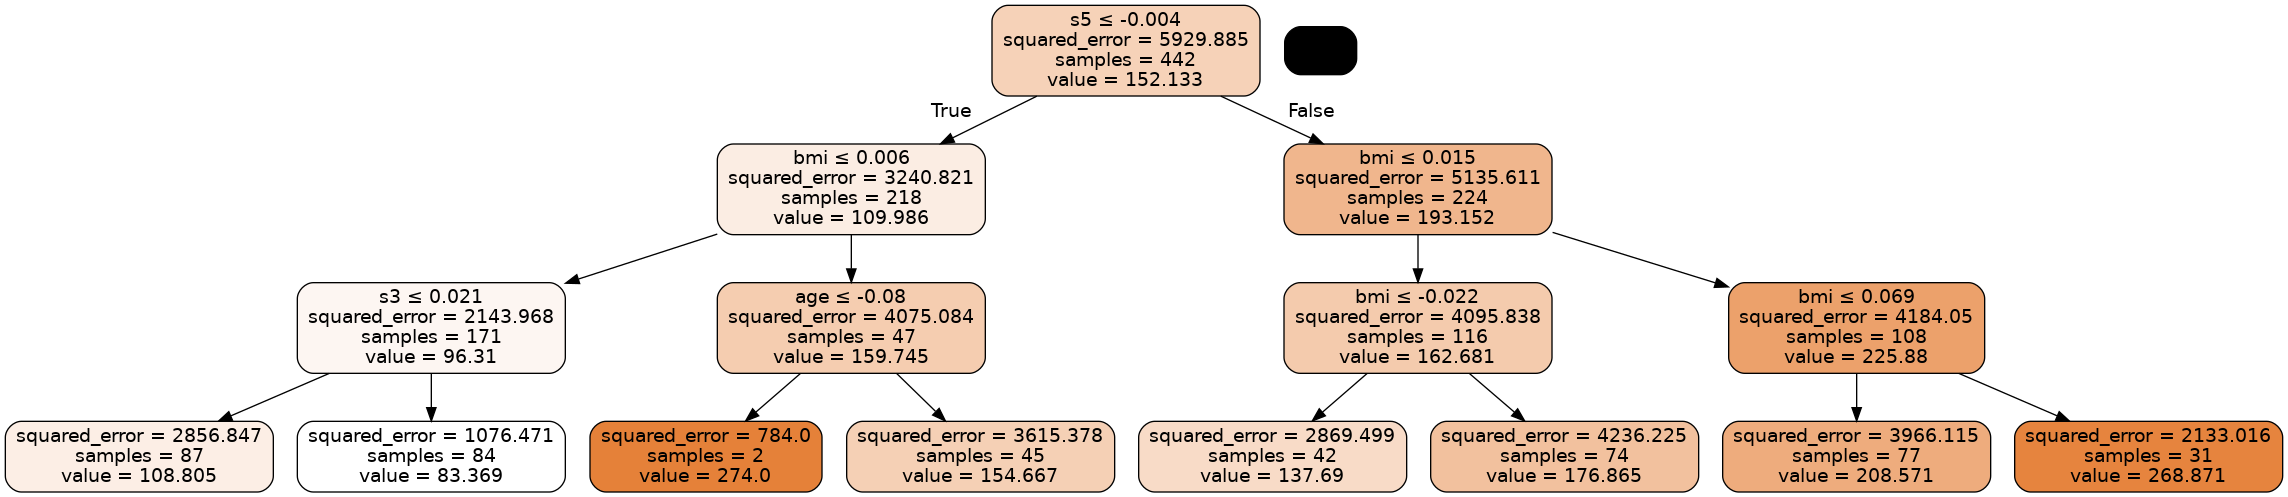

In [55]:
Image(get_png_tree(diabetes_tree_regr_prun, diabetes_x_ds.columns), height='70%')

In [79]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

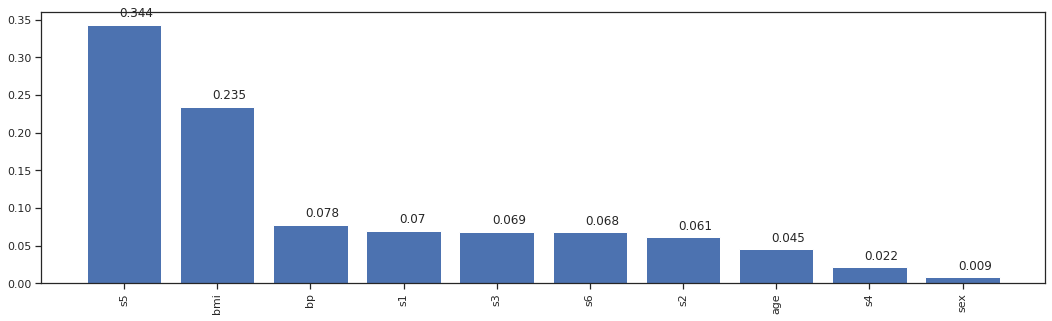

In [76]:
diabetes_tree_regr_fl, diabetes_tree_regr_fd = draw_feature_importances(diabetes_tree_regr, df_diabetes)

In [77]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [102]:
diabetes_tree_regr_fl[0:1]

['s5']

In [109]:
sorted_diabetes = df_diabetes[diabetes_tree_regr_fl]
sorted_diabetes

s5       bmi        bp        s1        s3        s6        s2  \
0    0.019908  0.061696  0.021872 -0.044223 -0.043401 -0.017646 -0.034821   
1   -0.068330 -0.051474 -0.026328 -0.008449  0.074412 -0.092204 -0.019163   
2    0.002864  0.044451 -0.005671 -0.045599 -0.032356 -0.025930 -0.034194   
3    0.022692 -0.011595 -0.036656  0.012191 -0.036038 -0.009362  0.024991   
4   -0.031991 -0.036385  0.021872  0.003935  0.008142 -0.046641  0.015596   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.031193  0.019662  0.059744 -0.005697 -0.028674  0.007207 -0.002566   
438 -0.018118 -0.015906 -0.067642  0.049341 -0.028674  0.044485  0.079165   
439 -0.046879 -0.015906  0.017282 -0.037344 -0.024993  0.015491 -0.013840   
440  0.044528  0.039062  0.001215  0.016318 -0.028674 -0.025930  0.015283   
441 -0.004220 -0.073030 -0.081414  0.083740  0.173816  0.003064  0.027809   

          age        s4       sex  
0    0.038076 -0.002592  0.050680  
1   -0.001882 -0.039493 -0.044642  
2    0.085299 -0.002592  0.050680  
3   -0.089063  0.034309 -0.044642  
4    0.005383 -0.002592 -0.044642  
..        ...       ...       ...  
437  0.041708 -0.002592  0.050680  
438 -0.005515  0.034309  0.050680  
439  0.041708 -0.011080  0.050680  
440 -0.045472  0.026560 -0.044642  
441 -0.045472 -0.039493 -0.044642  

[442 rows x 10 columns]

In [104]:
d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(
    sorted_diabetes, diabetes.target, test_size=0.3, random_state=1)

In [105]:
d_X_train.shape, d_X_test.shape

((309, 10), (133, 10))

In [106]:
d_tree_regr_feat_1 = DecisionTreeRegressor(random_state=1).fit(d_X_train, d_y_train)
d_y_test_predict = d_tree_regr_feat_1.predict(d_X_test)
d_y_test_predict.shape

(133,)

In [107]:
mean_absolute_error(d_y_test, d_y_test_predict)

69.30075187969925

In [110]:
d_tree_regr_feat_2 = DecisionTreeRegressor(random_state=1).fit(
    d_X_train[diabetes_tree_regr_fl[0:5]],d_y_train)
d_y_test_predict_2 = d_tree_regr_feat_2.predict(d_X_test[diabetes_tree_regr_fl[0:5]])
d_y_test_predict_2.shape


(133,)

In [111]:
mean_absolute_error(d_y_test, d_y_test_predict_2)

64.50375939849624

In [112]:
d_X_range = list(range(1, len(d_X_train.columns)+1))
d_X_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [114]:
mae_list = []
for i in d_X_range:
    # Обучим дерево и предскажем результаты на заданном количестве признаков 
    d_tree_regr_feat_3 = DecisionTreeRegressor(random_state=1).fit(
        d_X_train[diabetes_tree_regr_fl[0:i]], d_y_train)
    d_y_test_predict_3 = d_tree_regr_feat_3.predict(d_X_test[diabetes_tree_regr_fl[0:i]])
    temp_mae = mean_absolute_error(d_y_test, d_y_test_predict_3)
    mae_list.append(temp_mae)



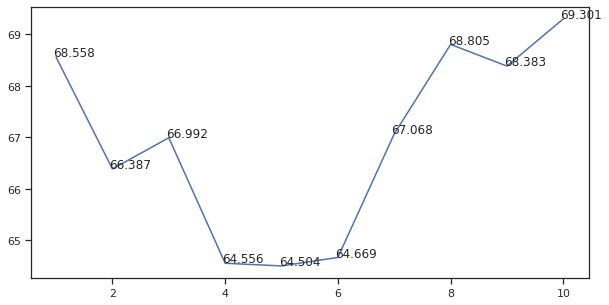

In [115]:
plt.subplots(figsize=(10,5))
plt.plot(d_X_range, mae_list)
for a,b in zip(d_X_range, mae_list):
    plt.text(a-0.05, b+0.01, str(round(b,3)))
plt.show()



In [116]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [119]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(df_diabetes, diabetes.target)

CPU times: user 282 ms, sys: 175 ms, total: 457 ms
Wall time: 24.9 s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='neg_mean_absolute_error')

In [120]:


-grid_1.best_score_, grid_1.best_params_



(13.206743609453177,
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04})